### 1.chocolate scrapping with beautifulsoup-project

In [2]:
# chocolate scrapping with beautifulsoup-project 
# in this project scrapping the data from this website "https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html"
# this website have Compiled ratings of over 1700 Chocolate bars Ratings are from 1-5
# from all to analysis and vitualization Cacao Ratings


In [15]:
#import library
from bs4 import BeautifulSoup                      # use for pulling data out of HTML and XML files
import requests                             #Requests is an elegant and simple HTTP library for Python, built for human beings.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#scrap data from the using page request.get

webpage = requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(webpage.content, 'html.parser')

# If  need to get all the <a> tags, or anything more complicated than the first tag with a certain name, 
# need to use one of the methods described in Searching the tree, such as find_all()

ratings_data = soup.find_all(attrs={'class': 'Rating'})     
ratings = []
for rating in ratings_data[1:]:                         # useing for loop append the rating data 
    ratings.append(float(rating.string))
    print(ratings)


Output hidden; open in https://colab.research.google.com to view.

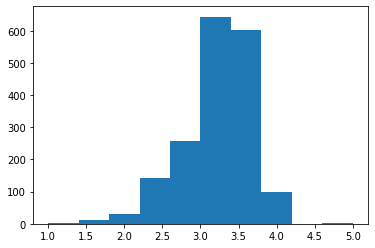

In [16]:
# plot histogram to see rating frequency
plt.hist(ratings)
plt.show()

In [17]:
# in histogram highest rating are 3 to 4 

In [18]:
# scrap the company name data -find out which have highest rating
company_data = soup.select('.Company')
companies =[] 
for company in company_data[1:]:
    companies.append(company.string)
    print(companies)

['A. Morin']
['A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A. Morin']
['A. Morin', 'A. Morin', 'A. Morin', 'A. Morin', 'A.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# create dictory and dataframe for comapny and rating
dict = {
'Company': companies,
'Rating': ratings,

}
df = pd.DataFrame.from_dict(dict)
df.head()



,Company,Rating
0,A. Morin,3.75
1,A. Morin,2.75
2,A. Morin,3.00
3,A. Morin,3.50
4,A. Morin,3.50


In [20]:
# check the rows and column
df.shape

(1795, 2)

In [21]:

df.isnull().sum()         # their is no null value

Company    0
Rating     0
dtype: int64

In [22]:
df.describe()      # using descibe() check the description of the data in the DataFrame

,Rating
count,1795.000000
mean,3.185933
std,0.478062
min,1.000000
25%,2.875000
50%,3.250000
75%,3.500000
max,5.000000


In [23]:
#in describe table see 75% of the rating is 3.5 and most of cocoapercenatge is 70% 

In [24]:
# using groupby arrange data company and rating
avg_ratings = df.groupby('Company').Rating.mean()
top_ten = avg_ratings.nlargest(10)
print(top_ten)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


In [25]:
top_voted = df.sort_values(['Rating'], ascending = False)

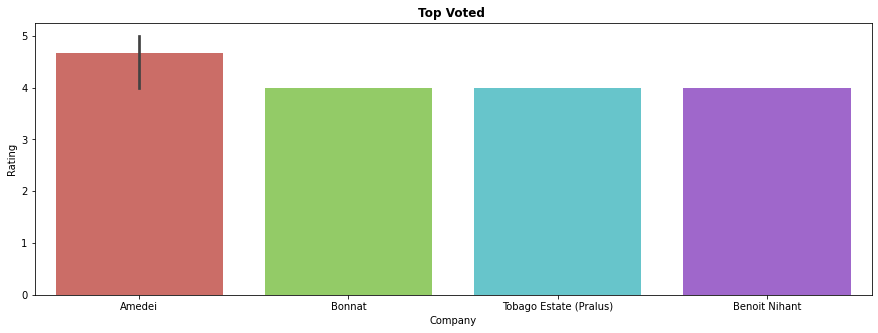

In [26]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Company'][:7],y=top_voted['Rating'][:7], palette = 'hls')
g.set_title("Top Voted ", weight = "bold")
plt.show()

In [27]:

cocoa_data = soup.select('.CocoaPercent')
cocoa_pcts = []
for cocoa_pct in cocoa_data[1:]:
    cocoa_pcts.append(int(float(cocoa_pct.string[:-1])))
    print(cocoa_pcts)
df['CocoaPercentage'] = cocoa_pcts
df.head()

[63]
[63, 70]
[63, 70, 70]
[63, 70, 70, 70]
[63, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63]
[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[63, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 63, 70, 63, 70, 70, 60, 80, 88, 72, 55, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 70, 70, 70, 70, 60, 60, 60, 60, 60, 60, 60, 80, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 85, 85, 72, 73, 64, 66, 75, 63, 70, 68, 70, 70, 75, 70, 70, 70, 70, 70, 70, 70, 63, 70, 66, 75, 85, 50, 75, 60, 75, 75, 75, 72, 75, 75, 70, 70, 73, 70, 70, 70, 70, 70, 70, 70, 70, 70, 73, 70, 68, 70, 70, 70, 70, 75, 70, 75, 72, 72, 72, 72, 100, 72, 72, 72, 72, 75, 72, 72, 80, 75, 72, 72, 72, 68, 72, 70, 77, 75, 70, 80, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 65, 70, 65, 73, 72, 80, 70, 70, 90, 64, 64, 64, 71, 70, 70, 70, 83, 78, 83, 74, 74, 74, 73, 72, 72, 55, 64, 88, 72, 72, 70, 74, 64, 72, 76, 76, 78, 86, 72, 75, 70, 65, 70, 78, 75, 65, 75, 65, 71, 75, 68, 70, 70, 70, 70, 70, 82, 72, 82, 75, 75, 75, 70, 70, 75, 75, 75, 65, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 100, 75, 75, 77, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Company,Rating,CocoaPercentage
0,A. Morin,3.75,63
1,A. Morin,2.75,70
2,A. Morin,3.00,70
3,A. Morin,3.50,70
4,A. Morin,3.50,70


In [28]:
# compant A morin have 3.75 rating which is 63% cocoapercentages

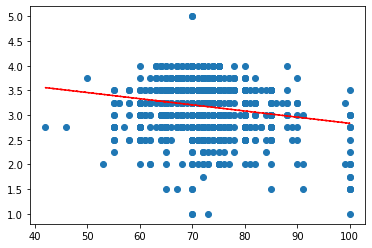

In [29]:
# plot scatter plot rating and cocoapercentage
plt.cla()
plt.scatter(df.CocoaPercentage, df.Rating)
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

